In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
import numpy as np

# Functions

## Partition function
$$
Z=2 \cosh{\beta E} = 2 \cosh{\frac{E}{k_B T}}
$$

## Thermodynamic functions
$$
U = -\frac{d \ln{Z}}{d\beta} = -E \tanh{\beta E}
$$

$$
F = -k_B T ln{Z} = -k_B T \ln{\left[2 \cosh{\beta E}\right]}
$$

$$
S = \frac{U-F}{T} = -\frac{E}{T} \tanh{\beta E} + k_B \ln{\left[2 \cosh{\beta E} \right]}
$$

$$
C_V = \left(\frac{\partial U}{\partial T} \right)_V = k_B \left(\beta E \right)^2 \cosh^{-2}{\beta E}
$$

In [2]:
kB = 8.6173303e-5 # eV K-1

def U(T, E):
    return -E * np.tanh(E / (kB*T))

def F(T, E):
    return -T * kB * np.log(2 * np.cosh(E / (kB*T)))

def S(T, E):
    return -2 * E / T * np.tanh(E / (kB*T)) + kB * np.log(2 * np.cosh(E / (kB*T)))
    
def CV(T, E):
    return kB * (E/(kB*T))**2 * np.cosh(E / (kB * T))**-2
funcs = [U, F, S, CV]

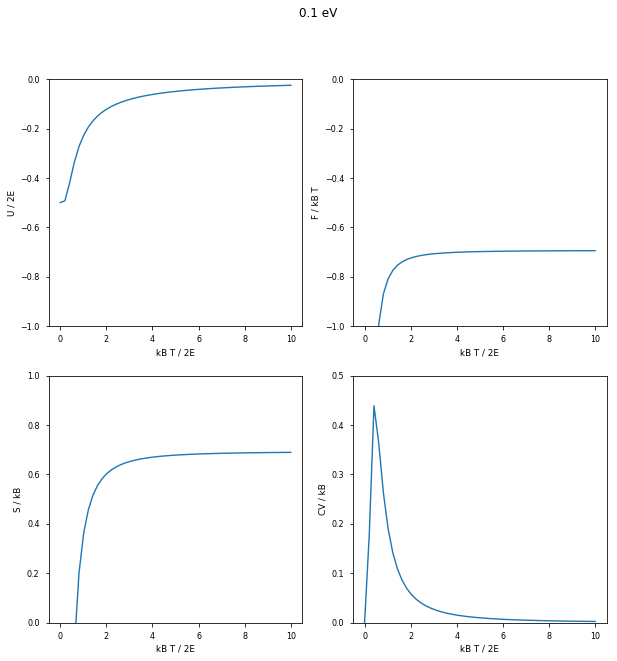

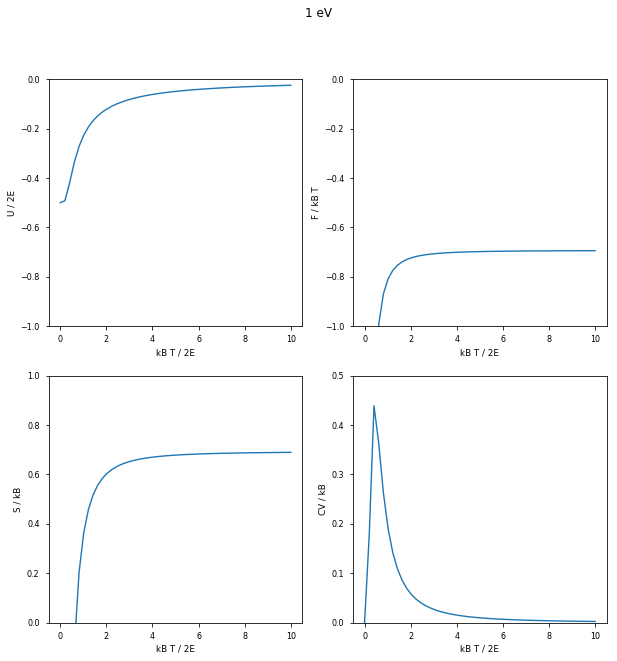

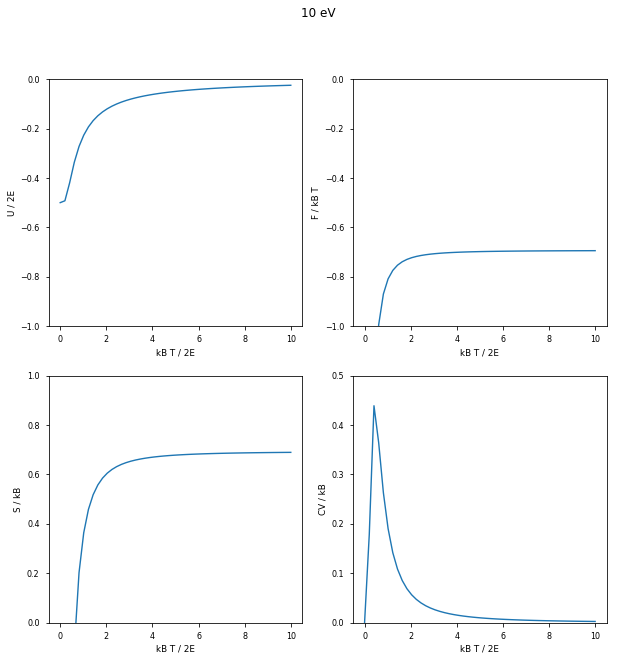

In [3]:
energies = [.1, 1, 10]
for E in energies:   
    T =  2*E/kB * np.linspace(0.001, 10)
    x = kB/(2*E) * T
    plt.figure(figsize=(10,10))
    plt.suptitle('{} eV'.format(E))
    
    plt.subplot(221)
    plt.plot(x, U(T, E) / (2*E))
    plt.ylim(-1, 0)
    plt.ylabel('U / 2E')
    plt.xlabel('kB T / 2E')
    
    plt.subplot(222)
    plt.plot(x, F(T, E)/ (kB*T))
    plt.ylim(-1,0)
    plt.ylabel('F / kB T')
    plt.xlabel('kB T / 2E')
    
    plt.subplot(223)
    plt.plot(x, S(T, E)/kB)
    plt.ylim(0, 1)
    plt.ylabel('S / kB')
    plt.xlabel('kB T / 2E')
    
    plt.subplot(224)
    plt.plot(x, CV(T, E)/(kB))
    plt.ylim(0, .5)
    plt.ylabel('CV / kB')
    plt.xlabel('kB T / 2E')

# Discussion

In general, the functions break down at low enough temperatures. 

The quantity $U/\Delta$ is -0.5 at $T=0$ but approaches 0 as $T$ increases and is not affected by the different energies.

The quantity $F/k_B T$ is not defined until about $T=E/k_B$ and quickly rises to $-0.7$. This also is not affected by different energy levels.

The quantity $S/k_B$ is not defined until about $T=E/k_B$ and quickly rises to $.7$. This also is not affected by different energy levels.

The quantity $C_V/k_B$ is quickly peaks at about $T=E/k_B$ and then asymptotically falls to $0$. This is also not affected by different energy levels.